# Homework #8:
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 10/16/2019|
|Updated | 10/16/2019|

## 13.5 Random Numbers (I)

### 1. Craps!
Let's generate two random numbers between 1 and 6 that simulate the rolling of two dice, like in craps.

In [1]:
import numpy as np
def Roll():
    """
    Roll two independent, standard die (1-6)
    and return their values.
    """
    
    #np.random.seed(1)
    d1 = np.random.randint(1, 7, 1)
    d2 = np.random.randint(1, 7, 1)
    
    return d1, d2

In [2]:
# Simply rerun this cell to roll!
d1, d2 = Roll()
print(d1, d2)

[2] [4]


### 2. "Boxcars"
Now that we can roll, let's do it a _million times_ ($N_0$) and count the number of times we get a pair of sixes, a.k.a., "boxcars", ($N_1$).

In [3]:
N_0 = int(1e6)
N_1 = 0
d1, d2 = 0, 0
rolls = np.zeros((N_0, 2), dtype=int)

for i in range(N_0):
    d1, d2 = Roll()
    rolls[i, 0], rolls[i, 1] = d1, d2
    if (d1 + d2) == 12:
        N_1 += 1

print("Total number of dice rolls:", N_0)     
print("Number of boxcars rolled:  ", N_1)
print("Probability of boxcars:    ", (100*N_1/N_0), "%")

Total number of dice rolls: 1000000
Number of boxcars rolled:   27794
Probability of boxcars:     2.7794 %


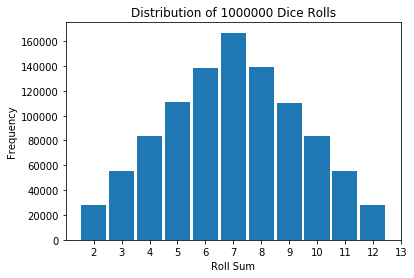

In [5]:
import matplotlib.pyplot as plt

bins = np.arange(2, 14, 1.0) - 0.5
plt.hist(rolls.sum(axis=1), bins, rwidth=0.9)
plt.title("Distribution of " + str(N_0) + " Dice Rolls")
plt.xlabel("Roll Sum")
plt.xticks(np.arange(2, 14, 1.0))
plt.ylabel("Frequency")
plt.show()

We can see in the histogram distribution of rolls above why the number seven (7) is so important in craps. This distribution is in fact a _binomial_ distribution.

### 3. Own Number Generator
Let's try to generate random integers within the range [-5, 5], without the use of NumPy. We'll use the standard _linear congruential generation_ formula, i.e.

$$ x' = (ax + c)\mod m, $$

where $a$, $c$ and $m$ are integer constants and $x$ is an integer variable known as the "seed."

First, let's start off by simply generating a "random" integer between 0 and 5. One approach is to _not_ set $m=5$, which would make our period quite short and less "random." Instead, we can still use a large value of $m$ (e.g., $2^{31}-1$), but take that resulting number _modulo_ 6.

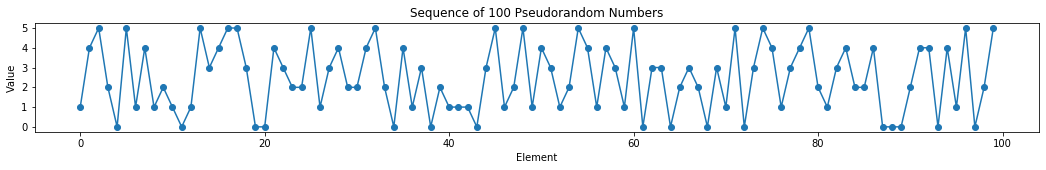

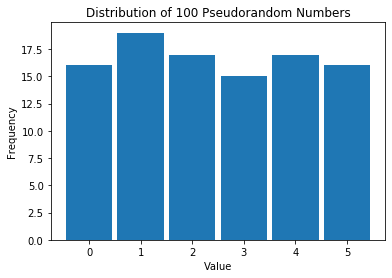

In [14]:
N = 100
a = 7**7
c = 0
m = 2**31-1
x = 1
results = np.zeros(N)

for i in range(N):
    x = (a*x+c)%m
    results[i] = x%6

def PlotSeq(data, y_start, y_stop, y_step):
    """
    Preconfigure plot for sequence of numbers in 'data' with
    y-axis range and scale set by 'y_start,' 'y_stop,' 'y_step.'
    """
    plt.figure(figsize=[18,2])
    plt.plot(data, "-o")
    plt.title("Sequence of " + str(data.size) + " Pseudorandom Numbers")
    plt.xlabel("Element")
    plt.ylabel("Value")
    plt.yticks(np.arange(y_start, y_stop, y_step))
    plt.show()

def PlotDist(data, x_start, x_stop, x_step):
    """
    Preconfigure plot for histogram of numbers in 'data' with
    bins set by 'x_start,' 'x_stop,' 'x_step.'
    """
    bins = np.arange(x_start, x_stop, x_step) - 0.5
    plt.hist(data, bins, rwidth=0.9)
    plt.xticks(np.arange(x_start, x_stop-1, x_step))
    plt.title("Distribution of " + str(data.size) + " Pseudorandom Numbers")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
    
PlotSeq(results, 0, 6, 1)
PlotDist(results, 0, 7, 1)

Now that we have a decent "random" sequence of integers between 0 and 5, let's expand this range to include integers as low as -5. One way to achieve this is by "randomly" choosing whether an element of the sequence is negative or positive. By using a _secondary_ similar set of pseudorandom numbers, $x_i\mod2$, we can get a pseudorandom sequence of _zeros_ and _ones_ that we can use to assign our primary set positive or negative.

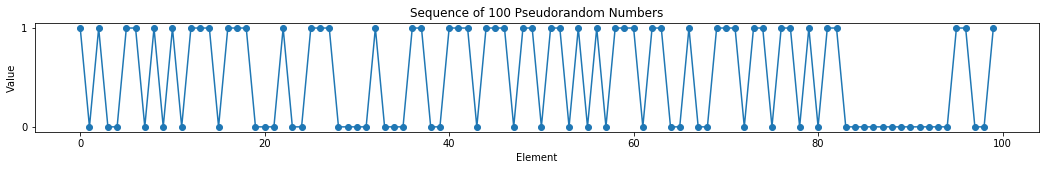

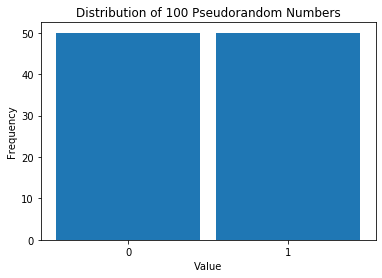

In [15]:
x2 = 1
signs = np.zeros(N)

for i in range(N):
    x2 = (a*x2+c)%m
    signs[i] = x2%2

PlotSeq(signs, 0, 2, 1)
PlotDist(signs, 0, 3, 1)

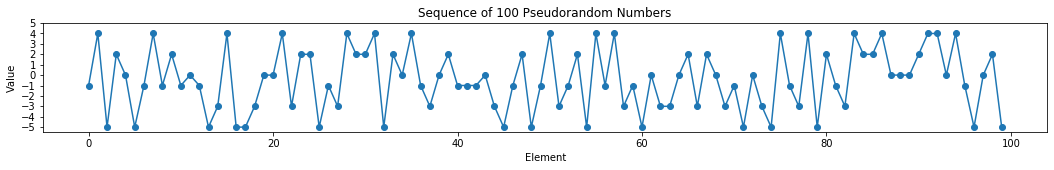

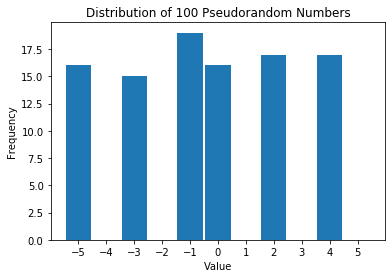

In [16]:
for i in range(N):
    if signs[i] == 1:
        results[i] *= -1

PlotSeq(results, -5, 6, 1)
PlotDist(results, -5, 7, 1)

Notice the gaps in the distribution: we only ever get -5, -3, -1, 0, 2, and 4, but never any of the other values. Let's try a different seed value for our secondary "signs" sequence.

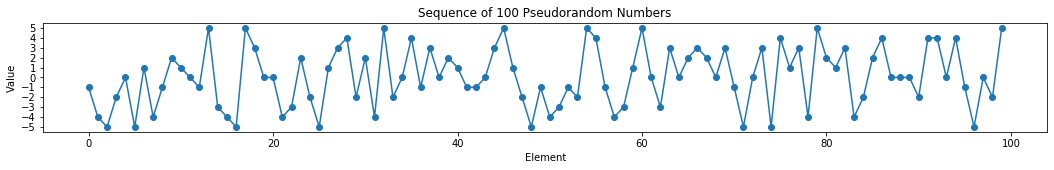

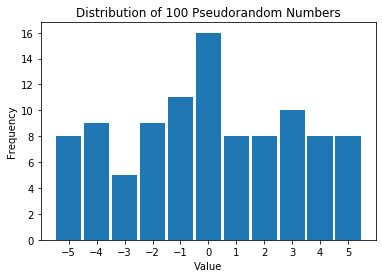

In [17]:
x2 = 2
signs = np.zeros(N)

for i in range(N):
    x2 = (a*x2+c)%m
    signs[i] = x2%2
    
for i in range(N):
    if signs[i] == 1:
        results[i] *= -1
    
PlotSeq(results, -5, 6, 1)
PlotDist(results, -5, 7, 1)

That looks better. We now get all integer values between -5 and 5. When both sequences had the same seed, there were gaps since each "raw" pseudorandom number in the sequence (i.e., _before_ performing any modulo divisions), would always yield the same results for _both_ modulo divisions. In other words, an $x_i\mod6 = 5$ would always be associated with $x_i\mod2=1$, since the $x_i$ were the same, and thereby become negative. By supplying both sequences with different seeds, e.g. $S_1: x_0=1$ and $S_2: x_0=2$, we "pseudorandomize" which primary sequence values become negative.

But notice we now have an issue at 0: it looks like there are twice as many zeros than any other pseudorandom number in the sequence. Let's confirm whether this is true for a larger sequence, e.g., $N=10000$.

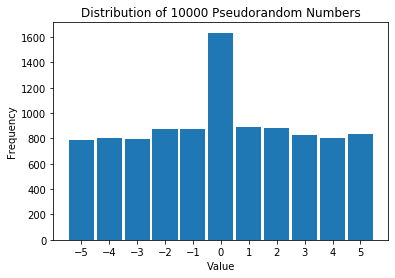

In [21]:
N = 10000
x = 1
x2 = 2
results = np.zeros(N)
signs = np.zeros(N)

for i in range(N):
    x = (a*x+c)%m
    results[i] = x%6

for i in range(N):
    x2 = (a*x2+c)%m
    signs[i] = x2%2
    
for i in range(N):
    if signs[i] == 1:
        results[i] *= -1
    
PlotDist(results, -5, 7, 1)

This makes sense actually if we think about how we pseudorandomly determine the sign: it's an artifact of $0 = 0\times-1 = 0\times1$. Thus, while we roughly "split" (or generate an equal number of) the other integers between the positive negatives, every time zero comes up in the primary sequence $S_1$, it remains the same. One solution would be to simply "throw away" half the zeros, e.g., everytime it's the case we have $0\times-1$ we just throw it away. However, this is a bit "hacky" and would result in a sequence that's shorter than the expected length $N$.

An even better way is to do the following:
1. Start over and generate pseudorandom numbers in the range 0 to 10 (inclusive). For large $N$, there should be a uniform distribution.
2. _Shift_ the entire dataset by subtracting for each element 5, preserving the uniform distribution.

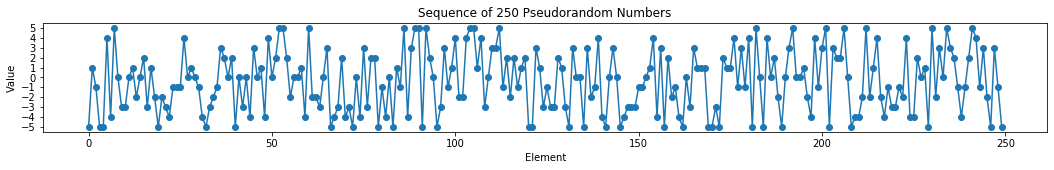

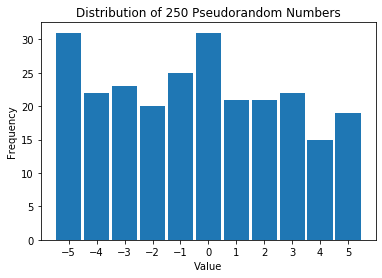

In [22]:
N = 250
results = np.zeros(N)

for i in range(N):
    x = (a*x+c)%m
    results[i] = x%11 - 5
    
PlotSeq(results, -5, 6, 1)
PlotDist(results, -5, 7, 1)

## 14.4 Random Numbers (II)

### 1. Brownian Motion
Let's visualize with an animation the position of a particle with Brownian motion, using Python's visual package.